# Part II - The Impacts of Loan Features on Borrower's APR
## by Olumide Olaoye


## Investigation Overview
In this investigation, I wanted to look at the features of loans that could be used to predict their Borrower APR. The main emphasis was on the Loan Original Amount, borrower's Prosper Rating (Alpha), loan term (Term), and borrower's Stated Monthly Income.


## Dataset Overview
The dataset consisted of Borrower APRs and attributes of 113,937 loans. The attributes included Loan Original Amount, borrower's Prosper Rating (Alpha), loan term (Term), borrower's Stated Monthly Income, as well as many other features such as borrower's Employment Status, Debt To Income Ratio, Current Loan Status, etc. 352 data points were removed from the analysis due to very large stated monthly income that seemed as outliers and missing borrower APR information.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
prosper = pd.read_csv('C:\\Users\\user\\Downloads\\ALX-T Udacity Nanodegree materials\\prosperLoanData.csv')
prosper.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [3]:
# Subset the dataframe by selecting features of interest
cols = ['LoanOriginalAmount', 'BorrowerAPR', 'StatedMonthlyIncome', 'Term', 'ProsperRating (Alpha)', 
        'EmploymentStatus']
prosper_sub = prosper[cols]
# Data wrangling
# To remove loans with missing borrower APR information
prosper_sub = prosper_sub[~prosper_sub['BorrowerAPR'].isnull()]
# Data wrangling
# To filter out loans with Stated Monthly income less than or equal to 30k
# to remove borrower records with income greater than 30k
prosper_sub = prosper_sub[prosper_sub.StatedMonthlyIncome <=30000]
# Convert ProsperRating from string to ordered categorical type
rate_order = ['HR', 'E', 'D', 'C', 'B', 'A', 'AA']
ordered_var = pd.api.types.CategoricalDtype(ordered=True, categories=rate_order)
prosper_sub['ProsperRating (Alpha)'] = prosper_sub['ProsperRating (Alpha)'].astype(ordered_var)
# Convert EmploymentStatus from string to ordered categorical type
emp_order = ['Employed', 'Self-employed', 'Full-time', 'Part-time', 'Retired', 'Other', 'Not employed', 'Not available']
ordered_var = pd.api.types.CategoricalDtype(ordered=True, categories=emp_order)
prosper_sub['EmploymentStatus'] = prosper_sub['EmploymentStatus'].astype(ordered_var)
prosper_sub.shape

(113585, 6)

## Distribution of Borrower APR
- The distribution of APR is multimodal. There are small peaks centered at 0.1 and 0.3. A large peak is centered at 0.2. Additionally, there is a very shape peak between 0.35 and 0.36. Only very few loans have APR greater than 0.43.

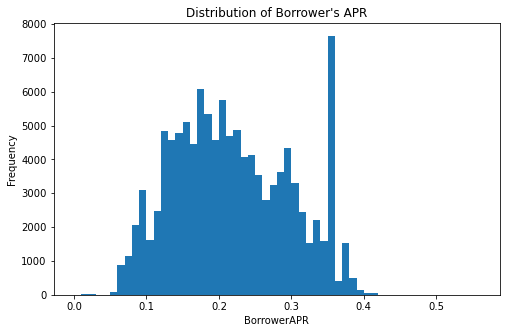

In [4]:
bins = np.arange(0, prosper_sub['BorrowerAPR'].max()+0.05, 0.01)
plt.figure(figsize=[8, 5])
plt.hist(data = prosper_sub, x = 'BorrowerAPR', bins = bins);
plt.title("Distribution of Borrower's APR");
plt.xlabel('BorrowerAPR');
plt.ylabel('Frequency');

## Distribution of Loan Original Amount
- The very high spikes in frequency are at 10k, 15k, 20k, 25k and 35k. There are also small spikes at 8k, 9k, 11k, 12k, 13k, 14k etc. It means that most of the loans are multiples of 1k.

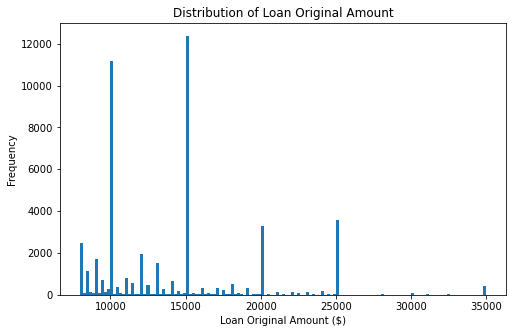

In [5]:
bins = np.arange(8000, prosper_sub['LoanOriginalAmount'].max()+200, 200)
plt.figure(figsize = [8, 5])
plt.hist(prosper_sub['LoanOriginalAmount'], bins = bins);
plt.title('Distribution of Loan Original Amount');
plt.xlabel('Loan Original Amount ($)');
plt.ylabel('Frequency');

## Relationship between Borrower APR and Loan Original Amount
- The regression plot shows that at different size of the Loan Original Amount, the Borrower APR has a large range, but the range of Borrower APR decreases with increase in Loan Original Amount.

- In all, the Borrower APR has a negative correlation with the Loan Original Amount.



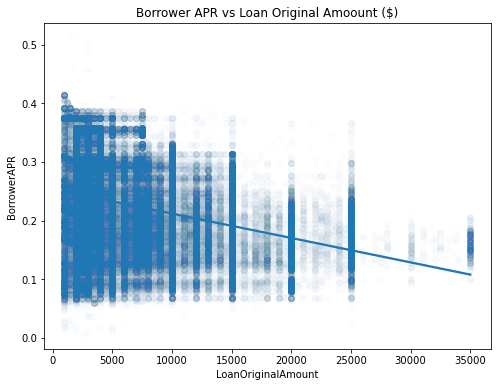

In [6]:
plt.figure(figsize=[8,6])
sns.regplot(data = prosper_sub, x = 'LoanOriginalAmount', y = 'BorrowerAPR', scatter_kws = {'alpha':0.01});
plt.title('Borrower APR vs Loan Original Amoount ($)');

## Relationship between Borrower APR and Prosper Rating
- The Borrower APR decreases with the better rating (Prosper Rating (Alpha)). Borrowers with the best Prosper Ratings have the lowest APR. It means that the Prosper Rating (Alpha) has a strong effect on Borrower APR.

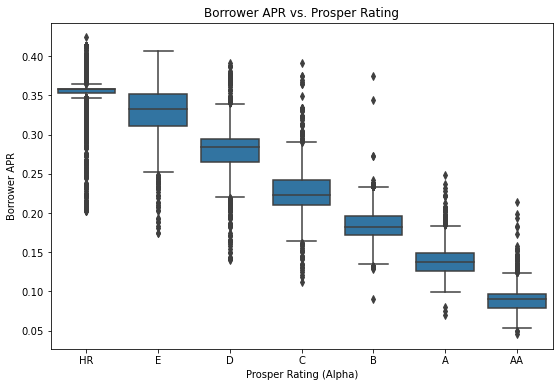

In [7]:
plt.figure(figsize=[9,6])
base_color = sns.color_palette()[0]
sns.boxplot(data=prosper_sub, x='ProsperRating (Alpha)', y='BorrowerAPR', color=base_color)
plt.xlabel('Prosper Rating (Alpha)')
plt.ylabel('Borrower APR')
plt.title('Borrower APR vs. Prosper Rating');

## Effect of Prosper Rating on Relationship between Borrower APR and Loan Original Amount
- The Loan Original Amount increases with better Prosper Rating (Alpha) score.

- The Borrower APR decreases with better Prosper Rating (Alpha) score.

- Interestingly, the relationship between Borrower APR and Loan original Amount turns from negative to slightly positive when the Prosper Ratings are increased from HR to A or better. This may be because people with A or AA ratings tend to borrow more money, increasing APR could prevent them from borrowing even more and maximize the profit. But people with lower Prosper Ratings tend to borrow less money, decreasing APR could encourage them to borrow more.

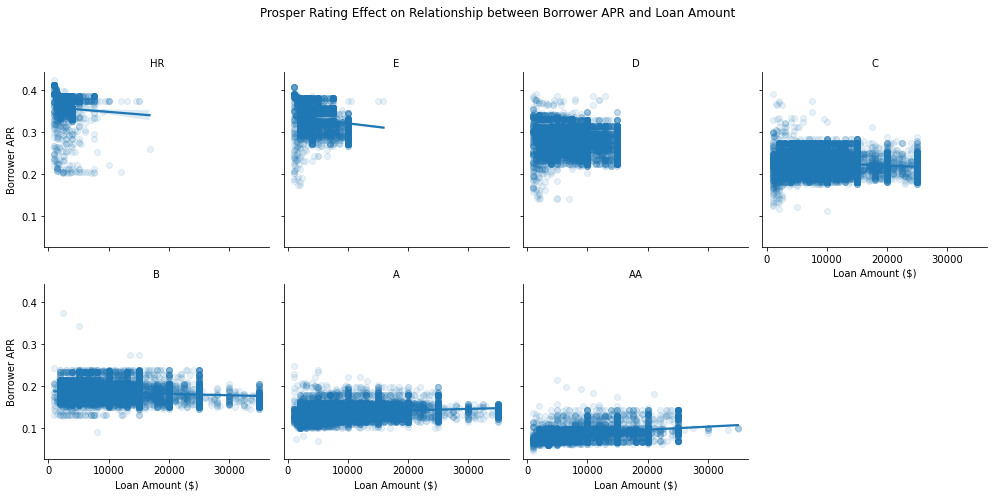

In [8]:
g=sns.FacetGrid(data=prosper_sub,col='ProsperRating (Alpha)', height=3.5, col_wrap=4)
g.map(sns.regplot, 'LoanOriginalAmount', 'BorrowerAPR', x_jitter=0.04, scatter_kws={'alpha':0.1});
g.set_titles('{col_name}')
g.add_legend();
g.set_xlabels('Loan Amount ($)')
g.set_ylabels('Borrower APR')
plt.suptitle('Prosper Rating Effect on Relationship between Borrower APR and Loan Amount');
plt.subplots_adjust(top=0.85)

## Effect of Borrower APR across Prosper Rating and Term
- It is noted that the Borrower APR decreases with the increase of loan term (Term) for people with HR-C ProsperRatings. But for people with B-AA ratings, the Borrower APR increases with the increase of loan term (Term).

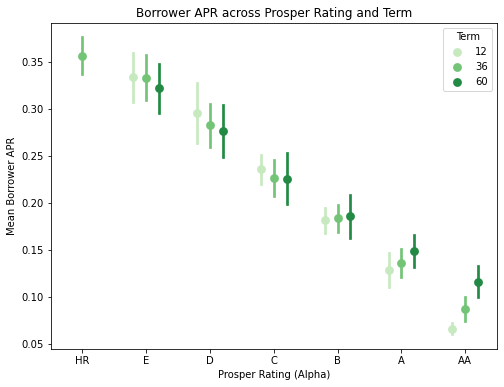

In [9]:
fig = plt.figure(figsize=[8, 6])
ax = sns.pointplot(data=prosper_sub, x='ProsperRating (Alpha)', y='BorrowerAPR', hue='Term',
                  palette='Greens', linestyles='', dodge=0.4, ci='sd');
plt.title('Borrower APR across Prosper Rating and Term');
plt.xlabel('Prosper Rating (Alpha)');
plt.ylabel('Mean Borrower APR');

In [ ]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_Prosper_Data_Explanation_Slide_Deck.ipynb --to slides --post serve --no-input --no-prompt